In [1]:
import skbeam.core.roi as roi 
import skbeam.core.correlation as corr
import skbeam.core.utils as utils
import skbeam.core.mask as mask

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

In [2]:
num_levels = 3
num_bufs = 8  # must be even
xdim = 200
ydim = 200
stack_size = 500
img_stack = np.random.randint(1, 10, (stack_size, xdim, ydim))
rois = np.zeros_like(img_stack[0])
# make sure that the ROIs can be any integers greater than 1. They do not
# have to start at 1 and be continuous
rois[0:xdim//10, 0:ydim//10] = 5
rois[xdim//10:xdim//5, ydim//10:ydim//5] = 3

In [3]:
#rois

In [4]:
g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        rois, img_stack)

In [5]:
bad_list = [4, 6, 167, 200, 456]

In [6]:
imgs = mask.bad_to_nan_gen(img_stack, bad_list)

In [7]:
imgs

<generator object bad_to_nan_gen at 0x103793af0>

In [8]:
images = []
for result in imgs:
    images.append(result)

In [9]:
num_levels, num_bufs, np.asarray(images).shape

(3, 8, (500, 200, 200))

In [10]:
g2_n, lag_steps_n = corr.multi_tau_auto_corr(num_levels, num_bufs,
                                        rois, np.asarray(images))

In [11]:
g2.shape, g2_n.shape

((16, 2), (16, 2))

In [12]:
g2_n

array([[ 1.26691715,  1.26577174],
       [ 1.00022311,  0.99942565],
       [ 0.99971438,  0.99948756],
       [ 1.00030501,  0.99891114],
       [ 0.99982163,  1.00077572],
       [ 1.00009121,  1.00004223],
       [ 0.99955578,  1.0000665 ],
       [ 0.99997274,  1.00066656],
       [ 0.99990999,  0.99979768],
       [ 1.00032889,  0.9993344 ],
       [ 0.99984861,  0.99962983],
       [ 1.00046264,  0.99942981],
       [ 0.99991734,  1.0001079 ],
       [ 1.00057439,  0.99996298],
       [ 0.99978118,  0.99996626],
       [ 0.99949656,  1.00018296]])

In [13]:
ty = 20
for i in range(4):
    ty -=1
    print ty

19
18
17
16


<IPython.core.display.Javascript object>


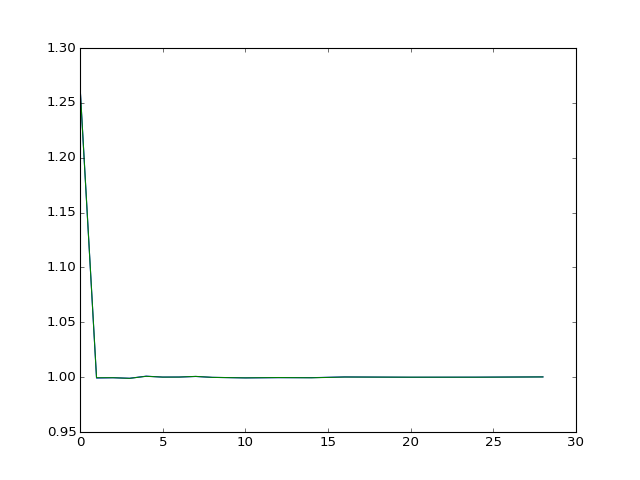

In [14]:
plt.plot(lag_steps, g2[:, 1], "b")
plt.plot(lag_steps, g2_n[:,1], "g")
plt.show()